<a href="https://colab.research.google.com/github/juliasbardelatti/testeAutomatizadoJasmine/blob/main/GlobalSolutionGrupoBranco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Grupo branco:**
- Antonny Mendonça: 89014 
- Júlia Sbardelatti: 87395 
- Rafael Soares Monteiro: 88668 
- Wellington dos Santos: 87743



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread

import cv2
from google.colab.patches import cv2_imshow

from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder
from pathfinding.core.diagonal_movement import DiagonalMovement

# Melhoramos a imagem binária para o fundo branco

In [ ]:
img = cv2.imread('/content/gs-1tiar.JPG')
kernel = np.ones((3,3),np.uint8)

In [ ]:

# Utilização do morphologyEx e blur
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel, iterations = 2)
blur = cv2.blur(closing,(36,36))

In [ ]:
gray = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray,103,255,cv2.THRESH_BINARY)

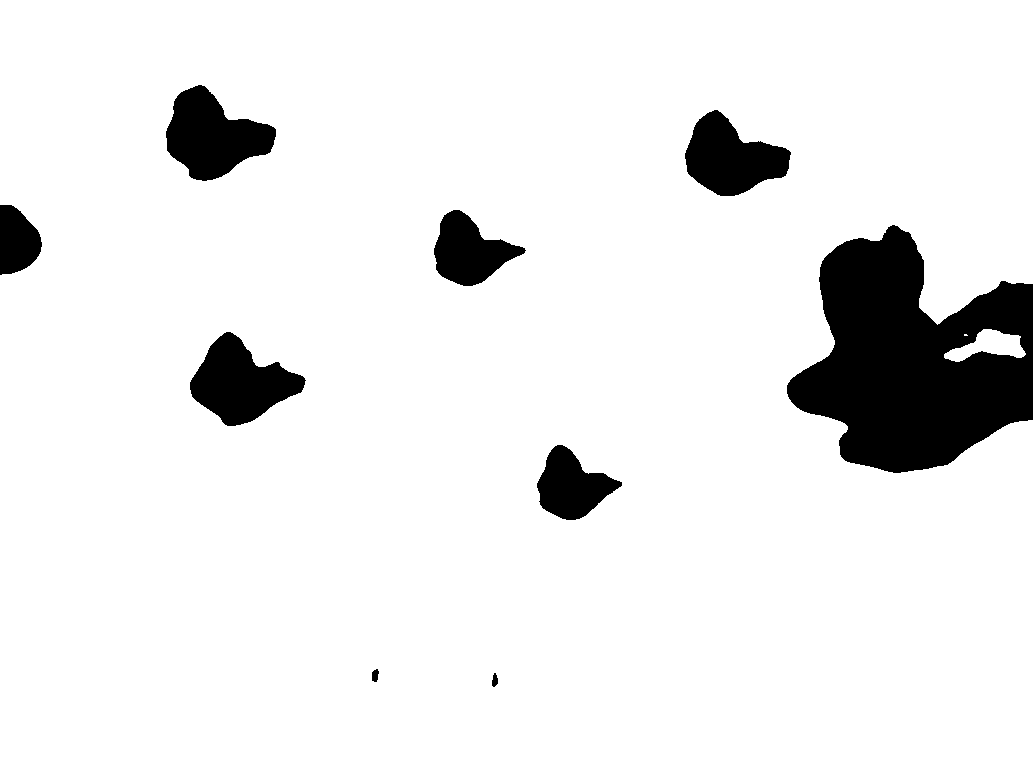

True

In [ ]:
cv2_imshow(mask)
cv2.imwrite("detectarPedra.jpg", mask)

# Dados da imgem

Foi preciso alterar informações da imagem para a visualização do mapa ao final :)

Por isso o uso do *resize*

In [ ]:

img = cv2.imread('/content/detectarPedra.jpg')
img = cv2.resize(img, (40, 30))


In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
matrix = np.array(img)

Plotamos a imagem para capturar a localização dos pontos

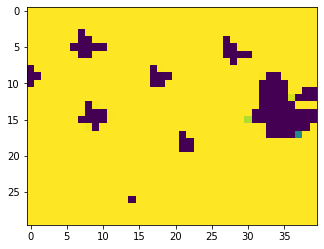

In [ ]:
plt.imshow(matrix)

In [ ]:
#pip install pathfinding

In [ ]:
grid = Grid(matrix = matrix)

inicio = grid.node(13,26)
objetivo = grid.node(35,3)

planejador = AStarFinder(diagonal_movement = DiagonalMovement.always)

caminho, _runs = planejador.find_path(inicio, objetivo, grid)
print(grid.grid_str(path=caminho, start=inicio, end=objetivo))


+----------------------------------------+
|                                        |
|                                        |
|                                        |
|       #                          xe    |
|       ##                  #     x      |
|      #####                ##   x       |
|       ##                  ####x        |
|                            # x         |
|#                #           x          |
|##               ##         x    ##     |
|#                ##        x    ####    |
|                          x     ####  ##|
|                         x      #### ###|
|        #               x       #####   |
|        ###            x       #########|
|        ###           x        #########|
|                     x           ###### |
|                    x#           ####   |
|                   x ##                 |
|                  x  ##                 |
|                 x                      |
|                x                       |
|          